# SOLUTION NOTEBOOK

---

# Polyfit on the bike sharing data set

## Exercise: Load the data set

> **Exercise**: Create the x/y **Numpy arrays**. The feature vector x should contain the temperature values. The target vector y should contain the number of users.

**Self-assessment**: You can run the test cell below.

In [1]:
import pandas as pd
import os

# Load the data into a Pandas DataFrame
data_df = pd.read_csv(os.path.join('data', 'bike-sharing-simple.csv'))

# Extract the x/y Numpy arrays
x = data_df.temp.values
y = data_df.users.values

print('x:', type(x), x.shape, x.dtype, x[:5])
print('y:', type(y), y.shape, y.dtype, y[:5])

x: <class 'numpy.ndarray'> (302,) float64 [ 0.1964  0.2     0.227   0.2043  0.1508]
y: <class 'numpy.ndarray'> (302,) int64 [120 108  82  88  41]


Test cell

In [2]:
import numpy as np

# Some test cases
assert type(x) == np.ndarray, 'x should be a Numpy array'
assert type(y) == np.ndarray, 'y should be a Numpy array'
assert x.shape == (302,), 'the shape of x should be (302,)'
assert y.shape == (302,), 'the shape of y should be (302,)'

print('tests passed!')

tests passed!


## Exercise: Fit a polynomial

> **Exercise**: (A) Fit a polynomial using the Numpy `polyfit()` function. You should test different degrees. (B) Print the optimal coefficients. (C) Plot the polynomial.

Coefficients: [ -8918.34020762  10259.76298372  -1491.58834515     56.90113664]


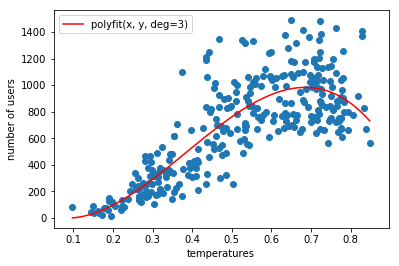

In [3]:
# (A) Fit a polynomial
coefs = np.polyfit(x, y, deg=3)

# (B) Print coefficients
print('Coefficients:', coefs)

# (C) Plot the polynomial
# Generate a hundred data points between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=100)

# Compute predictions for these sample data points
y_values = np.polyval(coefs, x_values)

# Plot the polynomial
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x_values, y_values, color='red', label='polyfit(x, y, deg=3)')
plt.legend()
plt.xlabel('temperatures')
plt.ylabel('number of users')
plt.show()

## Exercise: Evaluate your model

The RSS measure depends on the total number of data points since we sum the squared error over all data points. In practice, we prefer to have a measure that is independent of the number of observations. To achieve this, we can replace the sum by a mean, and we obtain the Mean Squared Error (MSE) measure.

$$
\text{MSE}=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

> **Exercise**: Implement the MSE measure.

**Self-assessment**: You can run the test cell below.

In [4]:
def MSE(y, y_pred):
    return np.mean(np.square(y - y_pred))

In [5]:
from numpy.testing import assert_almost_equal

y_test = np.array([1, 2, 3])
y_test_pred1 = np.array([1, 2, 3])
y_test_pred2 = np.array([1, 5, 3])
y_test_pred3 = np.array([1, 5, 6])

assert_almost_equal(MSE(y_test, y_test_pred1), 0, decimal=5)
assert_almost_equal(MSE(y_test, y_test_pred2), 3 , decimal=5)
assert_almost_equal(MSE(y_test, y_test_pred3), 6, decimal=5)

print('tests passed!')

tests passed!


MSE can still be a large number since we measure squared errors. One solution is to take the square root of MSE to obtain the Root Mean Squared Error (RMSE).

$$
\text{RMSE}=\sqrt{\text{MSE}}
$$

> **Exercise**: Compute the estimated values `y_pred` for the data points `x`. Print the RMSE score.

**Self-assessment**: The RMSE value should be between 207 and 235 depending on the degree of your polynomial.

In [6]:
# Compute predictions
y_pred = np.polyval(coefs, x)

# Print RMSE score
rmse = np.sqrt(MSE(y, y_pred))
print('MSE score:', rmse)

MSE score: 207.959415287
